In [1]:
import numpy as np
import pandas as pd
from itertools import islice
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
%run ../../src/acc_df.py
Ac = Acc_data('../../data/cleaned/coll_coord.csv')

In [3]:
week_d = Ac.get_weekly_cw_dummyfied(2004,2018)

In [4]:
a = 20
week_d['peak_week']= ((week_d['acc_nr'] - week_d['week_mean'] - a) > 0)*1 

In [5]:
week_d.head(3)

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,acc_nr,has_holiday,week_mean,year_red,peak_week
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,142,1,240.533333,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,263,0,260.800000,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,291,0,234.133333,0,1


In [6]:
Xl = week_d.drop(['acc_nr', 'week_mean'], axis=1) #, 'week_mean'

In [7]:
X = Xl.drop(['peak_week'], axis=1)
y = Xl['peak_week']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
model = GradientBoostingClassifier(learning_rate=0.001, 
                                  n_estimators=5000, #boosting stages to perform
                                  max_depth=3)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

In [9]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.8777589134125636, 0.8324873096446701)

----------------

In [10]:
X_train= X[X['year_red']<14]
X_test= X[X['year_red']==14]
y_train= y[X['year_red']<14]
y_test = y[X['year_red']==14]

In [11]:
model = GradientBoostingClassifier(learning_rate=0.001, 
                                  n_estimators=5000, #boosting stages to perform
                                  max_depth=3)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

In [12]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.8637602179836512, 0.9230769230769231)

In [13]:
y_18 = model.predict(X_test)
x = X_test.index.values
holiday_weeks=x[X_test['has_holiday']==1]

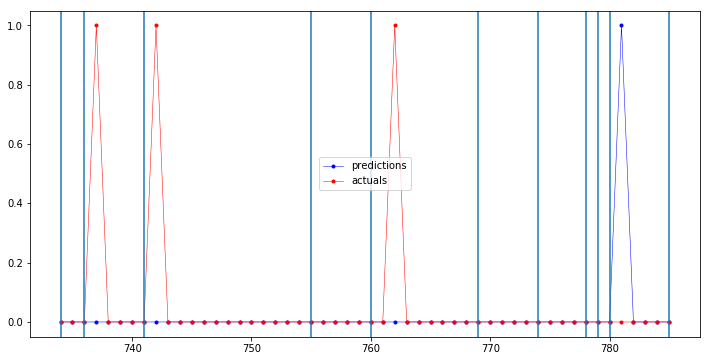

In [14]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x,y_18, 'b.-', label='predictions', lw=0.5)
ax.plot(x,y_test, 'r.-', label='actuals', lw=0.5)
for h in holiday_weeks:
    plt.axvline(x=h)
ax.legend()

##### Conclusion: This is not useful. 